## Import the Libraries

In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
from vevestaX import vevesta as v

## Load the Dataset

In [2]:
df=pd.read_csv('fish.csv')
df

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
0,0,0,1,0,0
1,1,1,1,0,0
2,1,0,1,0,0
3,1,1,2,1,0
4,1,0,1,0,1
...,...,...,...,...,...
245,1,1,2,0,0
246,1,1,4,3,0
247,1,1,2,1,0
248,1,1,3,2,0


In [3]:
#Create an Experiment Object
V=v.Experiment()

#In order to track the features/labels Vevesta provide us with a data sourcing function which help us to extract the features/labels used in our data set.
V.ds=df
#V.dataSourcing=df
V.ds

['LIVE_BAIT', 'CAMPER', 'PERSONS', 'CHILDREN', 'FISH_COUNT']

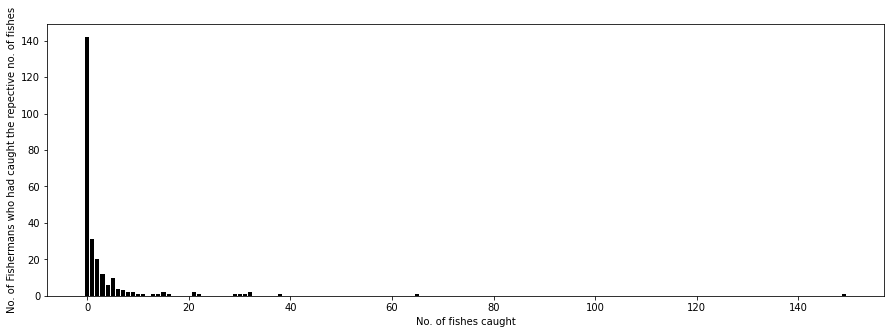

In [4]:
plt.figure(figsize=(15,5))
plt.bar(df.FISH_COUNT.value_counts().index,df.FISH_COUNT.value_counts(),color='black')
plt.xlabel('No. of fishes caught')
plt.ylabel('No. of Fishermans who had caught the repective no. of fishes')
plt.show()

## Train_Test_Split

In [5]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)
x_train=train.drop(['FISH_COUNT'],axis=1)
y_train=train['FISH_COUNT']
x_test=test.drop(['FISH_COUNT'],axis=1)
y_test=test['FISH_COUNT']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 4)
(200,)
(50, 4)
(50,)


## Fit the ZIP Model

In [6]:
import statsmodels.api as sm
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=x_train, exog_infl=x_train, inflation='logit').fit()

Optimization terminated successfully.
         Current function value: 3.212861
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
zip_predictions = zip_training_results.predict(x_test,exog_infl=x_test)
predicted_counts=np.round(zip_predictions)

In [8]:
from sklearn.metrics import mean_squared_error as mse
rmse=mse(predicted_counts,y_test,squared=False)
print(rmse)

7.937253933193772


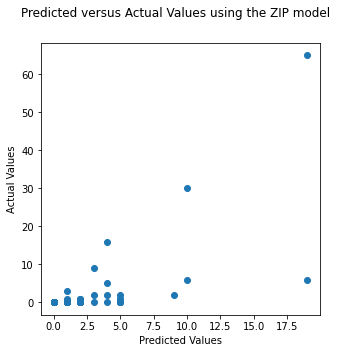

In [9]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Predicted versus Actual Values using the ZIP model')
plt.scatter(predicted_counts,y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Fit the Poisson Regressor Model

In [10]:
from sklearn.linear_model import PoissonRegressor

In [11]:
clf =PoissonRegressor()
clf.fit(x_train,y_train)

PoissonRegressor()

In [12]:
pred=clf.predict(x_test).round()
rmse=mse(y_test,pred,squared=False)
rmse

8.37973746605465

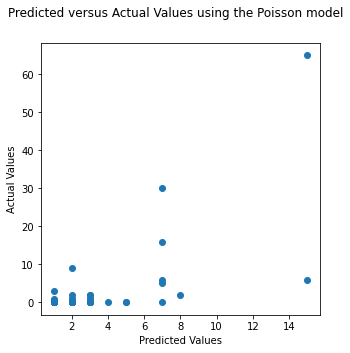

In [13]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Predicted versus Actual Values using the Poisson model')
plt.scatter(pred,y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Dump the model in the Excel Sheet

In [14]:
#After running the dump or commit function for each run of the code.The features used, features engineered and the variables used in the experiments get logged into the excel file.

V.dump(techniqueUsed='ZIP Model',filename="ZIP.xlsx",message="Zero Inflated Poisson Model was used",version=1)
V.commit(techniqueUsed = "Zip Model", message="increased accuracy", version=1, projectId=128, attachmentFlag=True)

Dumped the experiment in the file ZIP.xlsx
Manage notes, codes and models in one single place by using our tool at https://www.vevesta.com?utm_source=vevestaX
Dumped the experiment in the file vevesta.xlsx
Wrote experiment to tool, Vevesta
